## Titanic kaggle competition score 82 genuine.. and worth learning 

In [1]:

import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler

from numpy.random import seed

seed(11111)

In [2]:
train = pd.read_csv("Data/train.csv")
test = pd.read_csv("Data/test.csv")

# Putting on index to each dataset before split it
train = train.set_index("PassengerId")
test = test.set_index("PassengerId")

# dataframe 
df = pd.concat([train, test], axis=0, sort=False)

df

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0.0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1.0,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1.0,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1.0,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0.0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1305,NaN,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1306,NaN,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1307,NaN,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    1309 non-null   int64  
 2   Name      1309 non-null   object 
 3   Sex       1309 non-null   object 
 4   Age       1046 non-null   float64
 5   SibSp     1309 non-null   int64  
 6   Parch     1309 non-null   int64  
 7   Ticket    1309 non-null   object 
 8   Fare      1308 non-null   float64
 9   Cabin     295 non-null    object 
 10  Embarked  1307 non-null   object 
dtypes: float64(3), int64(3), object(5)
memory usage: 122.7+ KB


In [3]:
df.isna().sum()

Survived     418
Pclass         0
Name           0
Sex            0
Age          263
SibSp          0
Parch          0
Ticket         0
Fare           1
Cabin       1014
Embarked       2
dtype: int64

In [5]:
# Sex
change = {'female':0,'male':1}
df.Sex = df.Sex.map(change)

# Embarked
change = {'S':0,'C':1,'Q':2}
df.Embarked = df.Embarked.map(change)

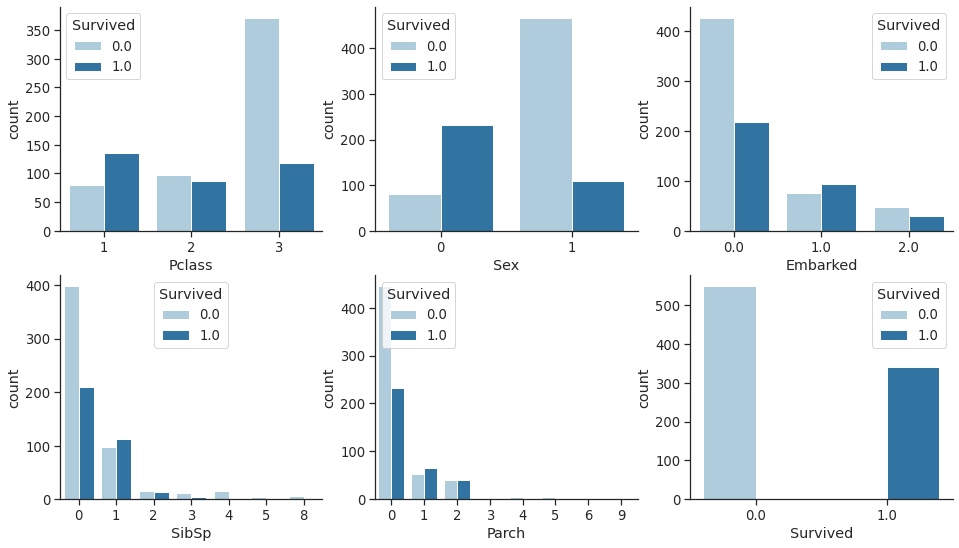

In [6]:
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Survived']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=feature, hue='Survived', palette='Paired')
    
sns.despine()

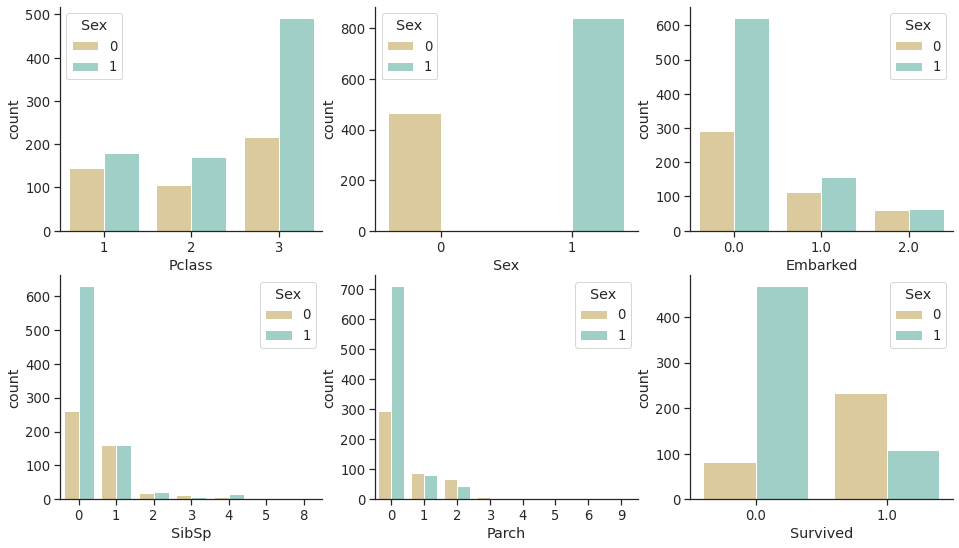

In [7]:
columns = ['Pclass', 'Sex','Embarked','SibSp', 'Parch','Survived']

plt.figure(figsize=(16, 14))
sns.set(font_scale= 1.2)
sns.set_style('ticks')

for i, feature in enumerate(columns):
    plt.subplot(3, 3, i+1)
    sns.countplot(data=df, x=feature, hue='Sex', palette='BrBG')
    
sns.despine()


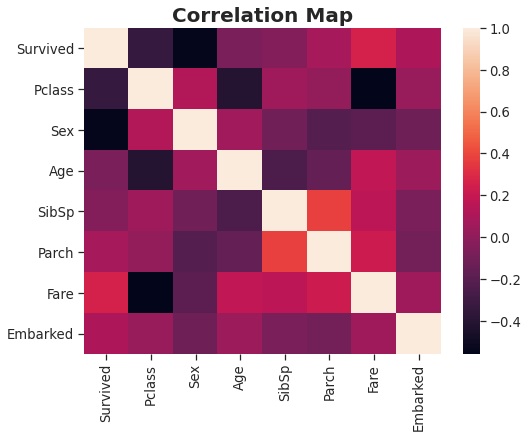

In [8]:
corr_df = df.corr()
fig, axs = plt.subplots(figsize=(8, 6))
sns.heatmap(corr_df).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});

In [9]:
df.groupby(['Pclass','Sex','Survived'])['Age'].median()

Pclass  Sex  Survived
1       0    0.0         25.0
             1.0         35.0
        1    0.0         45.5
             1.0         36.0
2       0    0.0         32.5
             1.0         28.0
        1    0.0         30.5
             1.0          3.0
3       0    0.0         22.0
             1.0         19.0
        1    0.0         25.0
             1.0         25.0
Name: Age, dtype: float64

In [10]:
#Filling the missing values with mean of Pclass and Sex.
df["Age"].fillna(df.groupby(['Pclass','Sex'])['Age'].transform("mean"), inplace=True)


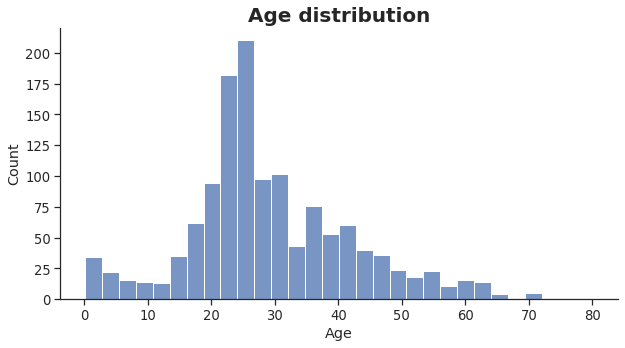

In [11]:
fig, axs = plt.subplots(figsize=(10, 5))
sns.histplot(data=df, x='Age').set_title("Age distribution",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

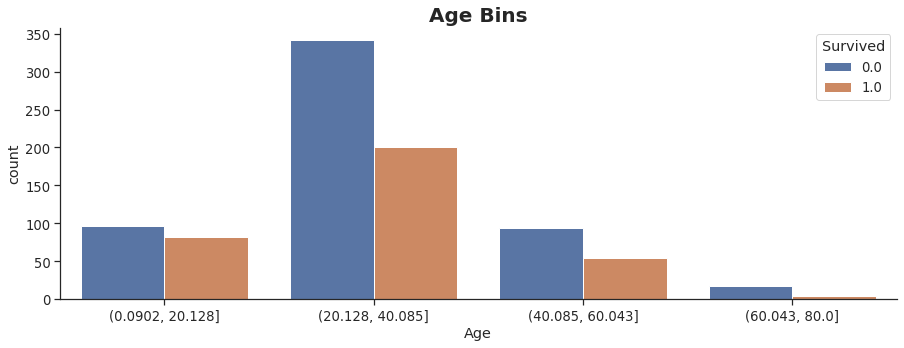

In [12]:
auxage = pd.cut(df['Age'], 4)
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxage, hue='Survived', data=df).set_title("Age Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()



In [13]:
# converting to categorical
df['Age'] = LabelEncoder().fit_transform(auxage) 


In [14]:
pd.crosstab(df['Age'], df['Survived'])

Survived,0.0,1.0
Age,,
0,97,82
1,341,200
2,94,55
3,17,5


In [15]:
df["Fare"].fillna(df.groupby(['Pclass', 'Sex'])['Fare'].transform("median"), inplace=True)

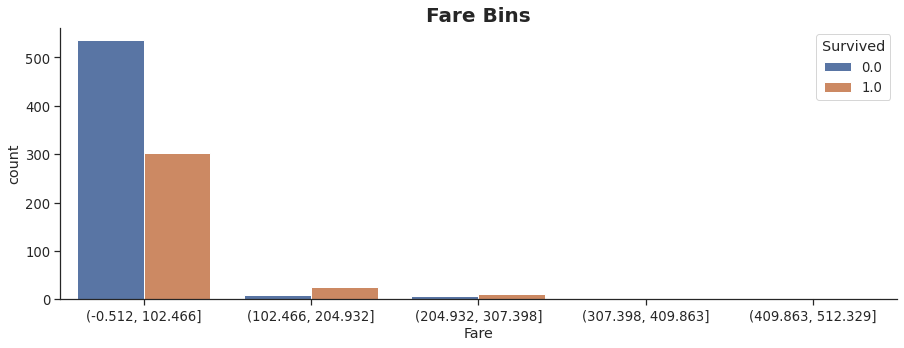

In [16]:
auxfare = pd.cut(df['Fare'],5)
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x=auxfare, hue='Survived', data=df).set_title("Fare Bins",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()

In [17]:
df['Fare'] = LabelEncoder().fit_transform(auxfare) 

In [18]:
pd.crosstab(df['Fare'], df['Survived'])

Survived,0.0,1.0
Fare,,
0,535,303
1,8,25
2,6,11
3,0,3


In [19]:
print("mean of embarked",df.Embarked.median())

df.Embarked.fillna(df.Embarked.median(), inplace = True)


mean of embarked 0.0


In [20]:
print("Percentage of missing values in the Cabin column :" ,round(df.Cabin.isna().sum()/ len(df.Cabin)*100,2))

Percentage of missing values in the Cabin column : 77.46


In [21]:
df.drop(['Cabin'], axis = 1, inplace = True)

In [22]:
df['Title'] = df.Name.str.extract('([A-Za-z]+)\.', expand = False)


In [23]:
df.Title.value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Don           1
Dona          1
Jonkheer      1
Mme           1
Capt          1
Countess      1
Sir           1
Name: Title, dtype: int64

In [24]:
least_occuring = ['Rev','Dr','Major', 'Col', 'Capt','Jonkheer','Countess']

df.Title = df.Title.replace(['Ms', 'Mlle','Mme','Lady'], 'Miss')
df.Title = df.Title.replace(['Countess','Dona'], 'Mrs')
df.Title = df.Title.replace(['Don','Sir'], 'Mr')

df.Title = df.Title.replace(least_occuring,'Rare')

df.Title.unique()


array(['Mr', 'Mrs', 'Miss', 'Master', 'Rare'], dtype=object)

In [25]:
pd.crosstab(df['Title'], df['Survived'])

Survived,0.0,1.0
Title,,
Master,17,23
Miss,55,132
Mr,437,82
Mrs,26,100
Rare,14,5


In [26]:
df['Title'] = LabelEncoder().fit_transform(df['Title']) 

In [27]:
# I got the total number of each family adding SibSp and Parch. (1) is the same passenger.
df['FamilySize'] = df['SibSp'] + df['Parch']+1
df.drop(['SibSp','Parch'], axis = 1, inplace = True)

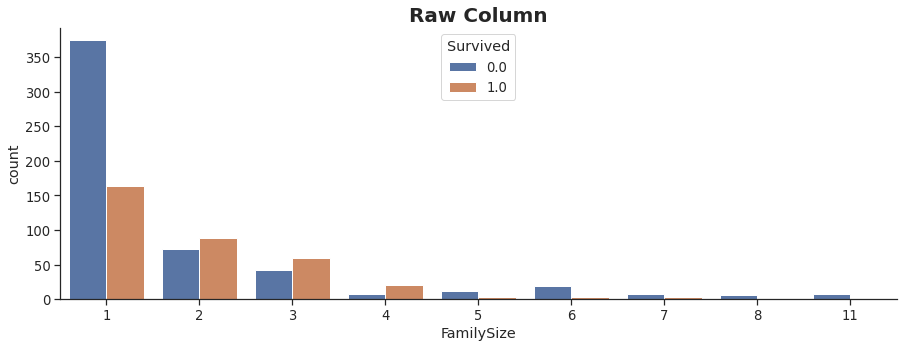

In [28]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='FamilySize', hue='Survived', data=df).set_title("Raw Column",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()


In [29]:
# Binning FamilySize column
df.loc[ df['FamilySize'] == 1, 'FamilySize'] = 0                            # Alone
df.loc[(df['FamilySize'] > 1) & (df['FamilySize'] <= 4), 'FamilySize'] = 1  # Small Family 
df.loc[(df['FamilySize'] > 4) & (df['FamilySize'] <= 6), 'FamilySize'] = 2  # Medium Family
df.loc[df['FamilySize']  > 6, 'FamilySize'] = 3                             # Large Family 

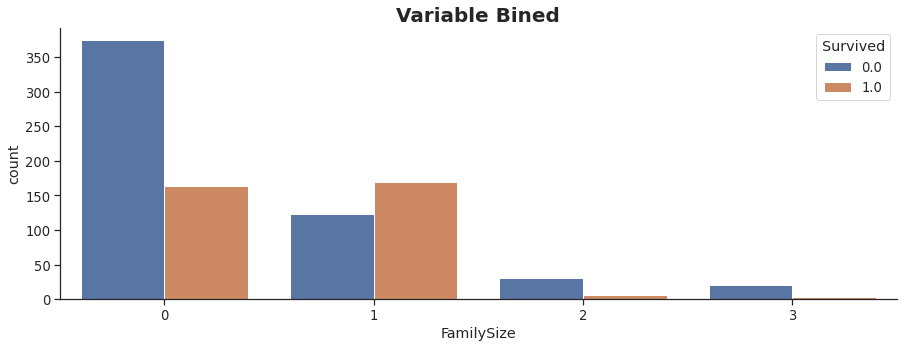

In [30]:
fig, axs = plt.subplots(figsize=(15, 5))
sns.countplot(x='FamilySize', hue='Survived', data=df).set_title("Variable Bined",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
sns.despine()


In [31]:
df['Ticket'] = df.Ticket.str.split().apply(lambda x : 0 if x[:][-1] == 'LINE' else x[:][-1])


In [32]:
df.Ticket = df.Ticket.values.astype('int64')

In [33]:
df['LastName'] = last= df.Name.str.extract('^(.+?),', expand = False)


In [34]:
df['WomChi'] = ((df.Title == 0) | (df.Sex == 0))


In [35]:
family = df.groupby([df.LastName, df.Pclass, df.Ticket]).Survived

df['FTotalCount'] = family.transform(lambda s: s[df.WomChi].fillna(0).count())
df['FTotalCount'] = df.mask(df.WomChi, (df.FTotalCount - 1), axis=0)

df['FSurvivedCount'] = family.transform(lambda s: s[df.WomChi].fillna(0).sum())
df['FSurvivedCount'] = df.mask(df.WomChi, df.FSurvivedCount - df.Survived.fillna(0), axis=0)

df['FSurvivalRate'] = (df.FSurvivedCount / df.FTotalCount.replace(0, np.nan))

In [36]:
df.isna().sum()

Survived           418
Pclass               0
Name                 0
Sex                  0
Age                  0
Ticket               0
Fare                 0
Embarked             0
Title                0
FamilySize           0
LastName             0
WomChi               0
FTotalCount        245
FSurvivedCount     245
FSurvivalRate     1014
dtype: int64

In [37]:
# filling the missing values
df.FSurvivalRate.fillna(0, inplace = True)
df.FTotalCount.fillna(0, inplace = True)
df.FSurvivedCount.fillna(0, inplace = True)

In [38]:
# You can review the result Family Survival Rate with these Families Heikkinen, Braund, Rice, Andersson,
# Fortune, Asplund, Spector,Ryerson, Allison, Carter, Vander, Planke

df[df['LastName'] == "Dean"]



,Survived,Pclass,Name,Sex,Age,Ticket,Fare,Embarked,Title,FamilySize,LastName,WomChi,FTotalCount,FSurvivedCount,FSurvivalRate
PassengerId,,,,,,,,,,,,,,,
94,0.0,3,"Dean, Mr. Bertram Frank",1,1,2315,0,0.0,2,1,Dean,False,0.0,0.0,0.0
789,1.0,3,"Dean, Master. Bertram Vere",1,0,2315,0,0.0,0,1,Dean,True,2.0,0.0,0.0
924,NaN,3,"Dean, Mrs. Bertram (Eva Georgetta Light)",0,1,2315,0,0.0,3,1,Dean,True,2.0,1.0,0.5
1246,NaN,3,"Dean, Miss. Elizabeth Gladys Millvina""""",0,0,2315,0,0.0,1,1,Dean,True,2.0,1.0,0.5


In [39]:
# Model
df['PassengerId'] = df.index

In [40]:
df = pd.get_dummies(df, columns=['Sex','Fare','Pclass'])


In [41]:
df.drop(['Name','LastName','WomChi','FTotalCount','FSurvivedCount','Embarked','Title'], axis = 1, inplace = True)


In [42]:
df.columns


Index(['Survived', 'Age', 'Ticket', 'FamilySize', 'FSurvivalRate',
       'PassengerId', 'Sex_0', 'Sex_1', 'Fare_0', 'Fare_1', 'Fare_2', 'Fare_3',
       'Pclass_1', 'Pclass_2', 'Pclass_3'],
      dtype='object')

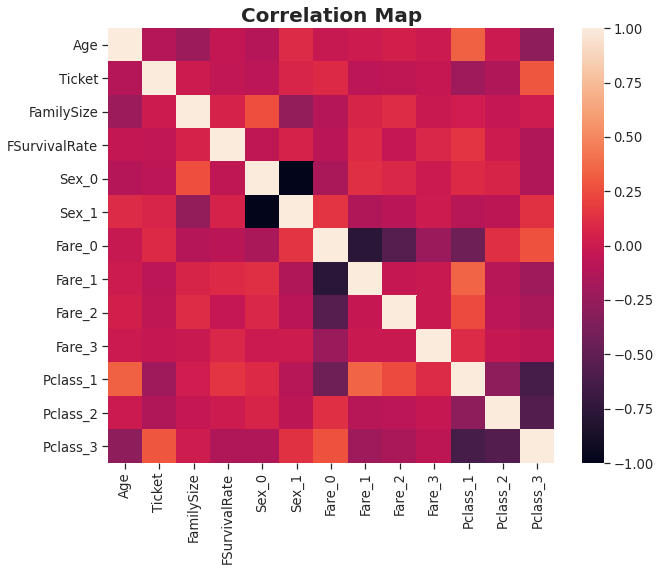

In [43]:
# I splitted df to train and test
train, test = df.loc[train.index], df.loc[test.index]

X_train = train.drop(['PassengerId','Survived'], axis = 1)
Y_train = train["Survived"]
train_names = X_train.columns

X_test = test.drop(['PassengerId','Survived'], axis = 1)

corr_train = X_train.corr()
fig, axs = plt.subplots(figsize=(10, 8))
sns.heatmap(corr_train).set_title("Correlation Map",fontdict= { 'fontsize': 20, 'fontweight':'bold'});
plt.show()



In [44]:
# Scaler
X_train = StandardScaler().fit_transform(X_train)
X_test = StandardScaler().fit_transform(X_test)


In [45]:
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)
Y_predDT = decision_tree.predict(X_test)

print("Accuracy of the model: ",round(decision_tree.score(X_train, Y_train) * 100, 2))


Accuracy of the model:  99.89


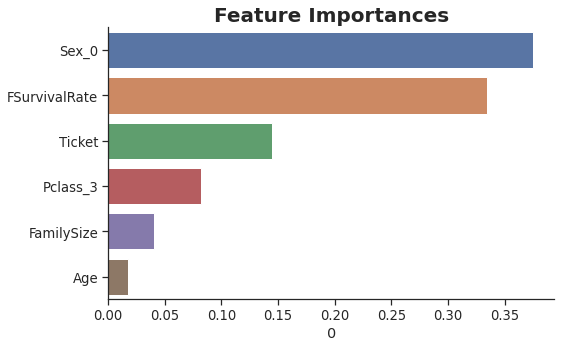

In [46]:
importances = pd.DataFrame(decision_tree.feature_importances_, index = train_names)
importances.sort_values(by = 0, inplace=True, ascending = False)
importances = importances.iloc[0:6,:] 

plt.figure(figsize=(8, 5)) 
sns.barplot(x=0, y=importances.index, data=importances,palette="deep").set_title("Feature Importances",
                                                                                 fontdict= { 'fontsize': 20,
                                                                                            'fontweight':'bold'});
sns.despine()

In [47]:
submit = pd.DataFrame({"PassengerId":test.PassengerId, 'Survived':Y_predDT.astype(int).ravel()})
submit.to_csv("submission8.csv",index = False)